# Evolution of characteristic function for the Lévy SDE

### Harish Bhat
*Department of Mathematics, University of Utah*

### Arnold D. Kim
*Department of Applied Mathematics, University of California, Merced*

In [1]:
import  time
print( 'Last updated: %s' %time.strftime('%d/%m/%Y') )

Last updated: 24/08/2018


In [5]:
# defaults for the codes below

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.rc( 'xtick', labelsize=14 ) 
plt.rc( 'ytick', labelsize=14 )

## Statement of the problem

We seek a numerical method to compute integrals of the form,
$$
K(s,u;h) = \int_{-\infty}^{\infty} e^{\mathrm{i} ( s - u ) y + \mathrm{i} h s f(y) } e^{-h |s g(y)|^{\alpha}} \mathrm{d}y.
$$
We would like to extend the numerical method described in the Jupyter notebook entitled, "*Computing the Cauchy distribution from its Fourier transform*".

## Oscillatory behavior of the integrand

We first study the behavior of the oscillatory part of the integrand because it is the oscillatory behavior that places demands on the quadrature rule.

The main assumption we make here is that $h$ is small. For that case, the oscillations due to $e^{\mathrm{i} ( s - u ) y}$ are likely to be much higher frequency than those of $e^{\mathrm{i} h s f(y)}$ due to the factor of $h$. In the code below, we examine this behavior.

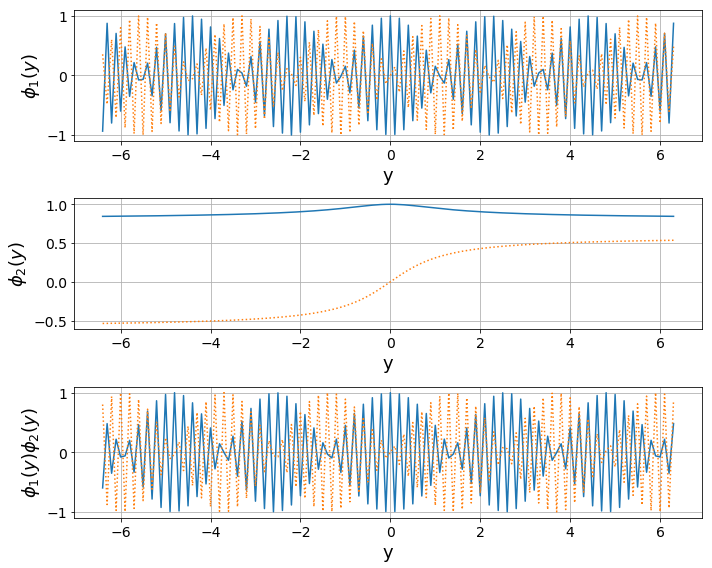

In [6]:
# set the parameter h

h = 0.01

# set the values for s and u

s = 40
u = 10

# compute the y grid

Ny = 128
L  = 12.8
dy = L / Ny
y  = np.arange( -L/2, L/2, dy )

# set f(y) = arctan(y)

f = np.arctan( y )

# compute the oscillatory functions

phi1 = np.exp( 1j * ( s - u ) * y )
phi2 = np.exp( 1j * s * h * f )
phi3 = phi1 * phi2

# plot the results

plt.subplot(311)
plt.plot( y, phi1.real, '-', y, phi1.imag, ':' )
plt.grid( True )
plt.xlabel( 'y', fontsize=18 )
plt.ylabel( '$\phi_{1}(y)$', fontsize=18 )

plt.subplot(312)
plt.plot( y, phi2.real, '-', y, phi2.imag, ':' )
plt.grid( True )
plt.xlabel( 'y', fontsize=18 )
plt.ylabel( '$\phi_{2}(y)$', fontsize=18 )

plt.subplot(313)
plt.plot( y, phi3.real, '-', y, phi3.imag, ':' )
plt.grid( True )
plt.xlabel( 'y', fontsize=18 )
plt.ylabel( '$\phi_{1}(y) \phi_{2}(y)$', fontsize=18 )

plt.tight_layout()
plt.show()

The top plot above is $e^{\mathrm{i} (s-u) y}$, the middle plot above is $e^{\mathrm{i} h s f(y)}$, and the bottom plot above is the product of those two functions. The real part of the function is plotted as a solid blue curve, and the imaginary part of the function is plotted as a dotted orange curve. 

From these results, we suspect that any aliasing errors when evaluating $K(s,u;h)$ will be due mostly to $e^{\mathrm{i} (s - u) y}$. For this reason, we seek to address that term in a product quadrature rule that we discuss below.

## Product quadrature to integrate over a finite interval

First, we introduce 
$$
\tilde{K}(s,u;h,L) = \int_{-L/2}^{L/2} e^{\mathrm{i} ( s - u ) y + \mathrm{i} h s f(y) } e^{-h |s g(y)|^{\alpha}} \mathrm{d}y,
$$
which is an approximation of $K(s,u;h)$ based on a truncation to the finite interval, $[-L/2, L/2]$. In studying the oscillatory behavior of the integrand above, we found that the high frequency oscillations are attributed to the factor, $e^{\mathrm{i} (s-u) y}$. Since the other factors vary slowly with $y$, we make use of the Lagrange linear interpolant of
$$
F(y;s,h) = e^{-h \left( | s g(y) |^{\alpha} - \mathrm{i} s y \right)}
$$
over $[y_{j},y_{j+1}]$, which is given by
$$
\ell_{1}(y) = \frac{y - y_{j}}{\Delta y} F(y_{j+1};s,h) 
- \frac{y - y_{j+1}}{\Delta y} F(y_{j};s,h).
$$
To approximate
$$
\int_{y_{j}}^{y_{j+1}} F(y;s,h) e^{\mathrm{i} (s-u) y} \mathrm{d}y,
$$
we replace $F(y;s,h)$ by $\ell_{1}(y)$, integrate that result exactly, and obtain
$$
\int_{y_{j}}^{y_{j+1}} F(y;s,h) e^{\mathrm{i} (s-u) y} \mathrm{d}y \approx \frac{m_{1}(y_{j}) - y_{j} m_{0}(y_{j})}{\Delta y} F(y_{j+1};s,h) - \frac{m_{1}(y_{j}) - y_{j+1} m_{0}(y_{j})}{\Delta y} F(y_{j};s,h),
$$
with
$$
m_{0}(y_{j}) = \int_{y_{j}}^{y_{j+1}} e^{\mathrm{i} (s - u) y} \mathrm{d}y = 
\begin{cases}
    y_{j+1} - y_{j} 
    & s = u,\\
    \displaystyle
    -\mathrm{i} \frac{e^{\mathrm{i} (s - u) y_{j+1}} - e^{\mathrm{i} (s - u) y_{j}}}{s - u} 
    & s \neq u,
\end{cases}
$$
and
$$
m_{1}(y_{j}) = \int_{y_{j}}^{y_{j+1}} y e^{\mathrm{i} (s - u) y} \mathrm{d}y = 
\begin{cases}
   \frac{1}{2} y_{j+1}^{2} - \frac{1}{2} y_{j}^{2} & s = u,\\
   \displaystyle
   e^{\mathrm{i} (s-u) y_{j+1}} \left( \frac{1}{(s-u)^{2}} - \frac{\mathrm{i} y_{j+1}}{(s-u)} \right)
   - e^{\mathrm{i} (s-u) y_{j}} \left( \frac{1}{(s-u)^{2}} - \frac{\mathrm{i} y_{j}}{(s-u)} \right)
   & s \neq u.
\end{cases}
$$
For convenience, we introduce
$$ w_{j} = - \frac{m_{1}(y_{j}) - y_{j+1} m_{0}(y_{j})}{\Delta y},$$
and
$$ w_{j+1} = \frac{m_{1}(y_{j}) - y_{j} m_{0}(y_{j})}{\Delta y},$$
so that this product quadrature rule can be written compactly as
$$\int_{y_{j}}^{y_{j+1}} F(y;s,h) e^{\mathrm{i} (s-u) y} \mathrm{d}y \approx w_{j} F(y_{j};s,h) + w_{j+1} F(y_{j+1};s,h).$$
By repeating this product quadrature rule over all subintervals $[y_{j},y_{j+1}]$ of $[-L/2,L/2]$, we obtain a numerical approximation for $\tilde{K}(s,u;h,L)$.

## Correcting the truncation error

We seek to determine the asymptotic expansion for the truncation error given by
$$
T(s,u;h,L) = 2 \text{Re} \int_{L/2}^{\infty} e^{-h \left( | s g(y) |^{\alpha} + \mathrm{i} s f(y) \right) + \mathrm{i} (s - u) y }
\mathrm{d}y.
$$

### Approximating the integrand

Since the integrand in $T(s,u;h,L)$ is sufficiently complicated, we seek to determine a useful asymptotic approximation for it, first. For this purpose, we work with the explicit choice for $f(y)$ and $g(y)$ given by
$$
f(y) = \arctan(y),
$$
and
$$
g(y) = \sqrt{1 + y^{2}}.
$$
What follows will be completely dependent on these choices. We will need to generalize the results below if we are to consider general choices for $f(y)$ and $g(y)$.

With these choices for $f(y)$, and $g(y)$, we make use of their asymptotic expansions for large argument:
$$
f(y) = \arctan(y) = \frac{\pi}{2} - y^{-1} + O(y^{-3}),
$$
and
$$
g(y) = \sqrt{1 + y^{2}} = y + \frac{1}{2} y^{-1} + O(y^{-3}).
$$
In the code below, we investigate the accuracy of using these asymptotic expansions to approximate $F(y;s,h)$.

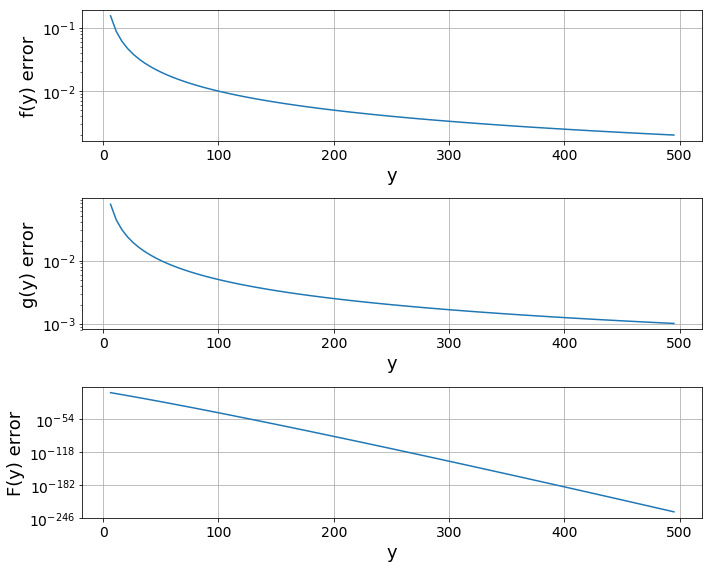

In [7]:
# test the approximation for F(y;s,h) that uses the asymptotic expansions for f and g

# compute the ybig grid over [L/2,1000]

Lybig = 500
Nybig = 100
ybig  = np.arange( L/2, Lybig, (Lybig-L/2)/Nybig )

# set the value of alpha (1 <= alpha <= 2)

alpha = 1.1

# compute f and its leading-order asymptotic approximation

fexact  = np.arctan( ybig )
fapprox = 0.5 * np.pi * np.ones( Nybig )

# compute g and its leading-order asymptotic approximation

gexact  = np.sqrt( 1 + ybig**2 )
gapprox = ybig

# compute F and its approximation

Fexact  = np.exp( -h * np.abs( s * gexact  ) ** alpha + 1j * s * h * fexact  )
Fapprox = np.exp( -h * np.abs( s * gapprox ) ** alpha + 1j * s * h * fapprox )

# plot the results

plt.subplot(311)
plt.semilogy( ybig, np.abs(fexact - fapprox) )
plt.grid( True )
plt.xlabel( 'y', fontsize=18 )
plt.ylabel( 'f(y) error', fontsize=18)

plt.subplot(312)
plt.semilogy( ybig, np.abs( gexact - gapprox ) )
plt.grid( True )
plt.xlabel( 'y', fontsize=18 )
plt.ylabel( 'g(y) error', fontsize=18)

plt.subplot(313)
plt.semilogy( ybig, np.abs( Fexact - Fapprox ) )
plt.grid( True )
plt.xlabel( 'y', fontsize=18 )
plt.ylabel( 'F(y) error', fontsize=18 )

plt.tight_layout()
plt.show()

These numerical results strongly suggest that using the approximations for $f(y)$ and $g(y)$ based on their asymptotic expansions for large argument will be accurate. Thus, we make use of the approximation
$$
F(y;s,h) \sim e^{-h \left( | s |^{\alpha} y^{\alpha} - \mathrm{i} s \pi/2 \right)},
$$
to approximate the truncation error, $T(s,u;h,L)$, in what follows.

### Truncation when $s = u$

For the case when $s = u$, we have
$$
\int_{b}^{\infty} e^{-a y^{\alpha}} \mathrm{d}y,
$$
with $a = h |s|^{\alpha}$ and $b = L/2$. We substitute $t = -a y^{\alpha}$ so that $\mathrm{d}t = -\alpha a y^{\alpha - 1} \mathrm{d}y = \alpha a^{1/\alpha} t^{1-1/\alpha} \mathrm{d}y$, and obtain
$$
\int_{b}^{\infty} e^{-a y^{\alpha}} \mathrm{d}y = \frac{1}{\alpha a^{1/\alpha}} \int_{a b^{\alpha}}^{\infty} t^{1/\alpha - 1} e^{-t} \mathrm{d}t = \frac{1}{\alpha a^{1/\alpha}} \Gamma(\alpha^{-1}, a b^{\alpha}),
$$
with $\Gamma(s,x)$ denoting the [upper incomplete Gamma function](https://en.wikipedia.org/wiki/Incomplete_gamma_function#Definition). Resubstituting for $a$ and $b$, we find that
$$
e^{\mathrm{i} s h \pi/2} \int_{L/2}^{\infty} e^{-h |s|^{\alpha} y^{\alpha}} \mathrm{d}y = \frac{e^{\mathrm{i} s h \pi/2}}{\alpha h^{1/\alpha} |s|} \Gamma(\alpha^{-1}, h (|s| L/2)^{\alpha}).
$$
Scipy provides a method for evaluating the [normalized upper incomplete Gamma function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gammaincc.html#scipy.special.gammaincc) which we may use to evaluate this result.

### Truncation when $|s - u| \ll 1$

We now consider the case in which $|s - u| \ll 1$. For the integral,
$$
I(k) = \int_{b}^{\infty} F(y) e^{\mathrm{i} k y} \mathrm{d}y, \quad k \ll 1,
$$
we find through integration-by-parts that
$$
I(k) = e^{\mathrm{i} k y} \int F(y) \mathrm{d}y \bigg|_{b}^{\infty} + O(k).
$$
Using $k = s - u$, $b = L/2$, and $F(y) = e^{-h |s|^{\alpha} y^{\alpha}}$, and using the result for the case when $s = u$, we find that
$$
T(s,u;h,L) \sim \frac{e^{\mathrm{i} (s-u) L/2} e^{\mathrm{i} s h \pi/2}}{\alpha h^{1/\alpha} |s|} \Gamma(\alpha^{-1}, h (|s| L/2)^{\alpha}) + O(|s - u|).
$$
Note that this result gives the correct result when $s = u$. One can think of this result as a perturbation of the previous result.

*It would be useful to know if this approximation is sufficient for the needs of this computation. Through repeated integration-by-parts, we can obtain a higher-order asymptotic approximation. However, doing so will require integration of the $\Gamma$, which will require careful consideration.*

### Truncation when $|s - u| \gg 1$

Since we are not able to integrate exactly when $|s - u| \gg 1$, we determine an asymptotic expansion of $T(s,u;h,L)$ through repeated integration-by-parts. For the integral,
$$
I(k) = \int_{b}^{\infty} F(y) e^{\mathrm{i} k y} \mathrm{d}y, \quad k \gg 1,
$$
we find through repeated integration-by-parts that
$$
I(k) = \frac{e^{\mathrm{i} k y}}{\mathrm{i}k} F(y)\bigg|_{b}^{\infty}
- \frac{e^{\mathrm{i} k y}}{(\mathrm{i}k)^{2}} F'(y)\bigg|_{b}^{\infty}
+ \frac{e^{\mathrm{i} k y}}{(\mathrm{i}k)^{3}} F''(y)\bigg|_{b}^{\infty}
- \frac{e^{\mathrm{i} k y}}{(\mathrm{i}k)^{4}} F'''(y)\bigg|_{b}^{\infty}
+ \cdots.
$$
Suppose that $F$ and all of its derivatives vanish as $y \to \infty$. For that case, we find that
$$
I(k) = - \frac{e^{\mathrm{i} k b}}{\mathrm{i}k} F(b) 
+ \frac{e^{\mathrm{i} k b}}{(\mathrm{i}k)^{2}} F'(b)
- \frac{e^{\mathrm{i} k b}}{(\mathrm{i}k)^{3}} F''(b)
+ \frac{e^{\mathrm{i} k b}}{(\mathrm{i}k)^{4}} F'''(b)
- \cdots.
$$
Next, we use the fact that when $F(y) = e^{\Phi(y)}$, it follows that
$$
\begin{aligned}
   F'(y) &= e^{\Phi(y)} \left[ \Phi'(y) \right],\\
   F''(y) &= e^{\Phi(y)} \left[ \left( \Phi'(y) \right)^{2} + \Phi''(y) \right],\\
   F'''(y) &= e^{\Phi(y)} \left[ \left( \Phi'(y) \right)^{3} + 3 \Phi'(y) \Phi''(y) + \Phi'''(y) \right],
\end{aligned}
$$
and so
$$
I(k) = e^{\Phi(b) + \mathrm{i} k b} \left[ - \frac{1}{\mathrm{i}k}
+ \frac{\Phi'(b)}{(\mathrm{i}k)^{2}}
- \frac{\left( \Phi'(b) \right)^{2} + \Phi''(b)}{(\mathrm{i}k)^{3}}
+ \frac{\left( \Phi'(b) \right)^{3} + 3 \Phi'(b) \Phi''(b) + \Phi'''(b)}{(\mathrm{i}k)^{4}}
- \cdots \right].
$$

To compute the truncation, we set $\Phi(y) = -h |s|^{\alpha} y^{\alpha}$ and $k = s - u$. It follows that $\Phi'(y) = - \alpha h |s|^{\alpha} y^{\alpha - 1}$. Substituting these expressions into the the result from above, we obtain
$$
T(s,u;h,L) \sim - e^{-h |s|^{\alpha} (L/2)^{\alpha} + \mathrm{i} (s - u) L/2 + \mathrm{i} s h \pi/2} \left[ \frac{1}{\mathrm{i} (s - u)} + \frac{\alpha h |s|^{\alpha}  (L/2)^{\alpha-1}}{(s-u)^{2}} + O\left( \frac{h |s|^{\alpha}}{|s-u|^{3} (L/2)^{2-\alpha}}  \right) \right].
$$